In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

loading the digits dataset

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [17]:
print("shape of the images data {}".format(digits.data.shape))
print('shape of the images targets {}'.format(digits.target.shape))

shape of the images data (1797, 64)
shape of the images targets (1797,)


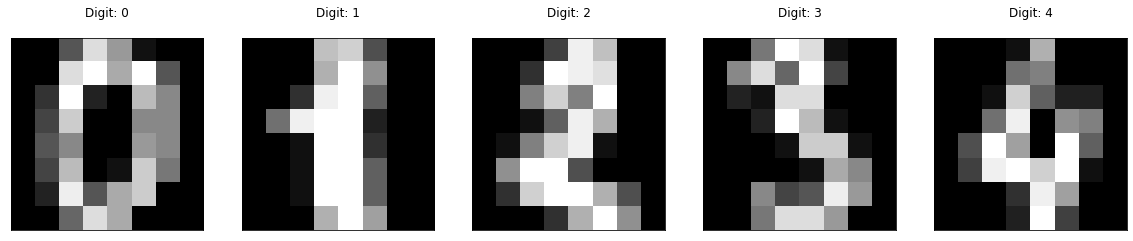

In [5]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.images[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.binary_r)
    plt.title('Digit: {}\n'.format(label))
    plt.xticks([])
    plt.yticks([])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=.25, random_state=7)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
log_res = LogisticRegression(max_iter=10000)

In [10]:
log_res.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0.5, 1.0, 'actual class 1 - predicted class 1')

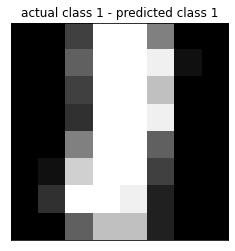

In [11]:
predicted_class = log_res.predict(X_test[10].reshape(1, -1))
plt.imshow(X_test[10].reshape((8, 8)), cmap=plt.cm.binary_r)
plt.xticks([])
plt.yticks([])
plt.title('actual class {}'.format(y_test[10]) + ' - ' + 'predicted class {}'.format(predicted_class[0]))

In [12]:
predicted_classes = log_res.predict(X_test)

In [13]:
score = accuracy_score(y_test, predicted_classes)

In [14]:
log_res.score(X_test, y_test)

0.9577777777777777

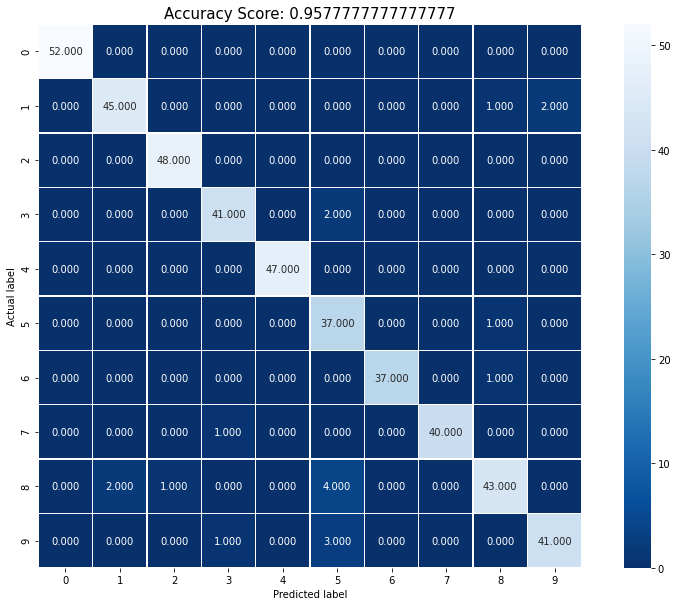

In [15]:
matrix = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(15, 10))
sns.heatmap(matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [16]:
mnist = fetch_openml('mnist_784')

In [18]:
print("shape of the images data {}".format(mnist.data.shape))
print('shape of the images targets {}'.format(mnist.target.shape))

shape of the images data (70000, 784)
shape of the images targets (70000,)


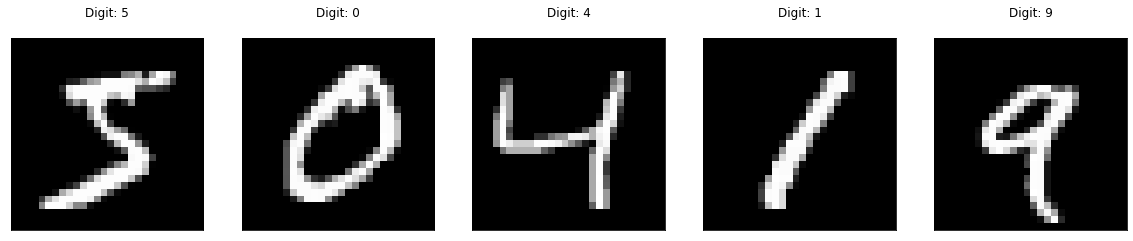

In [20]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(mnist.data[0:5], mnist.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image.reshape((28, 28)), cmap=plt.cm.binary_r)
    plt.title('Digit: {}\n'.format(label))
    plt.xticks([])
    plt.yticks([])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=.14, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [43]:
pipe.score(X_test, y_test)

0.9166411590654014

In [44]:
predicted_classes = pipe.predict(X_test)

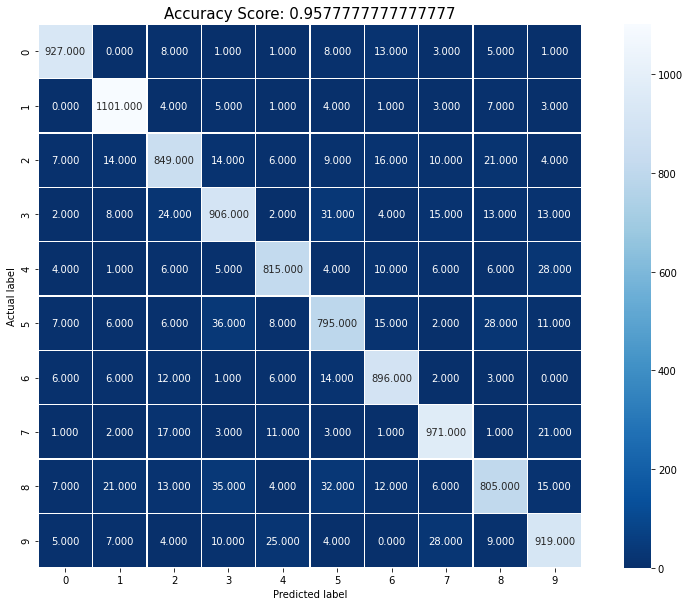

In [45]:
matrix = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(15, 10))
sns.heatmap(matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);